# Exercise 3
Author: Elias Djupesland
## 1

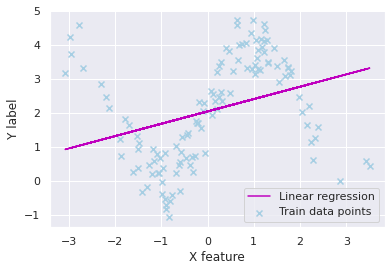

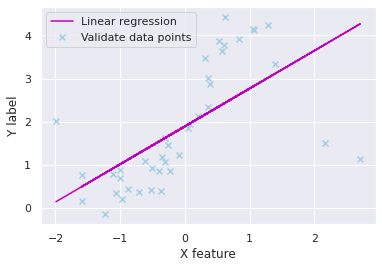

Training model MSE: 1.6972590276596946
Validation model MSE: 1.5824595419701237


In [164]:
import operator
import pandas as pd  # To read data
import sklearn
import numpy as np
from matplotlib.colors import ListedColormap
from tabulate import tabulate
from sklearn import datasets
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(style="darkgrid",palette="Paired")

df = pd.read_csv ('regression_nonlin.csv')

r = 42
X = df["X"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy().reshape(-1, 1)

#Splitting into train, validation and test
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, random_state=r)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=r) # 0.25 x 0.8 = 0.2
train_reg = LinearRegression().fit(X_train, y_train)
val_reg = LinearRegression().fit(X_val,y_val)

#Visualize
plt.figure(1)
plt.scatter(X_train,y_train, marker="x", label="Train data points")
plt.plot(X_train,train_reg.predict(X_train), "m-", label="Linear regression")
plt.xlabel("X feature")
plt.ylabel("Y label")
plt.legend()
plt.show()

plt.figure(2)
plt.scatter(X_val,y_val, marker="x", label="Validate data points")
plt.plot(X_val,val_reg.predict(X_val), "m-", label="Linear regression")
plt.xlabel("X feature")
plt.ylabel("Y label")
plt.legend()
plt.show()


y_true = y_test
y_pred_train = train_reg.predict(X_test)
train_MSE = sklearn.metrics.mean_squared_error(y_true, y_pred_train)
print("Training model MSE: "+ str(train_MSE))

y_pred_val = val_reg.predict(X_test)
val_MSE = sklearn.metrics.mean_squared_error(y_true, y_pred_val)
print("Validation model MSE: "+ str(val_MSE))


Polynominal Regression of degree 2

| Model    |    RMSE |       R2 |
|----------|---------|----------|
| Train    | 1.46809 | 0.10645  |
| Validate | 1.20489 | 0.239056 |

----------------------------------------------

Polynominal Regression of degree 3

| Model    |     RMSE |       R2 |
|----------|----------|----------|
| Train    | 0.899776 | 0.664351 |
| Validate | 0.678989 | 0.75835  |

----------------------------------------------

Polynominal Regression of degree 5

| Model    |     RMSE |       R2 |
|----------|----------|----------|
| Train    | 0.527715 | 0.884544 |
| Validate | 0.451701 | 0.893054 |

----------------------------------------------

Polynominal Regression of degree 10

| Model    |     RMSE |       R2 |
|----------|----------|----------|
| Train    | 0.502193 | 0.895442 |
| Validate | 0.46359  | 0.88735  |

----------------------------------------------

Polynominal Regression of degree 20

| Model    |     RMSE |       R2 |
|----------|----------|-------

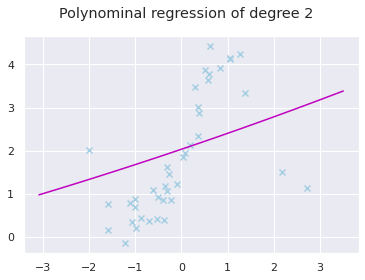

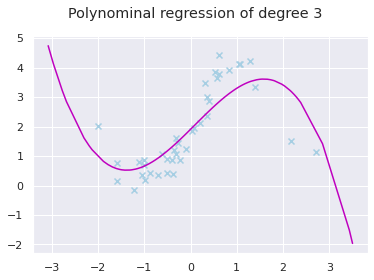

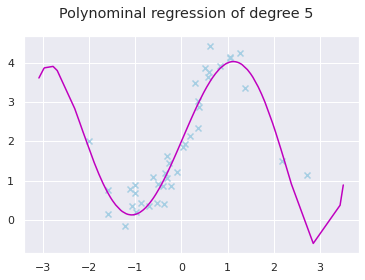

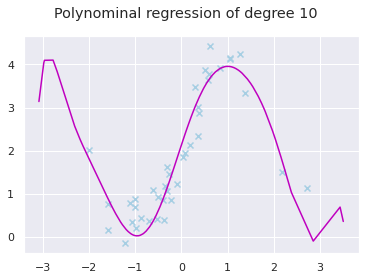

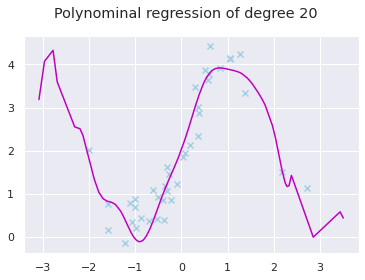

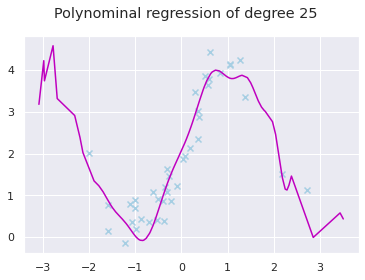

In [165]:
def Pol(deg,X_train,y_train,X_val,y_val):
    print("\nPolynominal Regression of degree " + str(deg))
    p= PolynomialFeatures(degree=deg)
    X_train_poly = p.fit_transform(X_train)
    X_val_poly = p.fit_transform(X_val)

    pol = LinearRegression()
    pol.fit(X_train_poly, y_train)
    y_pred_t = pol.predict(X_train_poly)
    y_pred_v = pol.predict(X_val_poly)

    t_rmse = np.sqrt(mean_squared_error(y_train,y_pred_t))
    v_rmse = np.sqrt(mean_squared_error(y_val,y_pred_v))
    t_r2 = r2_score(y_train,y_pred_t)
    v_r2 = r2_score(y_val,y_pred_v)

    print("\n" + tabulate([['Train', str(t_rmse), str(t_r2)], ['Validate', str(v_rmse), str(v_r2)]], headers=['Model', 'RMSE', "R2"], tablefmt="github"))

    plt.figure()
    plt.suptitle("Polynominal regression of degree "+str(deg))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_pred_t), key=sort_axis)
    x, y_pred_t = zip(*sorted_zip)

    plt.scatter(X_val, y_val, marker="x", label="Validate data points")
    plt.plot(x, y_pred_t, color='m')
    plt.show()

    print("\n----------------------------------------------")

degrees=[2,3,5,10,20,25]

for deg in degrees:
    Pol(deg,X_train,y_train,X_val,y_val)


Number of degrees [20,25] seems overfitted.

Number of degrees [2] seems underfitted.

Testing different approach to finding best number of degrees using sklearn pipeline and GridSearchCV


Best degree param: 10
Mean cross-validated score 0.8720613402069134


Polynominal Regression of degree 10

| Model    |     RMSE |       R2 |
|----------|----------|----------|
| Train    | 0.502193 | 0.895442 |
| Validate | 0.46359  | 0.88735  |

----------------------------------------------


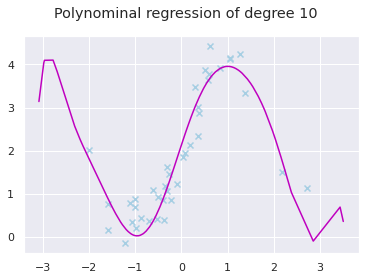

In [166]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(26)}
grid = GridSearchCV(PolynomialRegression(), param_grid)
grid.fit(X_train, y_train)

model = grid.best_estimator_

print("Best degree param: "+ str(grid.best_params_['polynomialfeatures__degree']))
print("Mean cross-validated score "+ str(grid.best_score_) + "\n")

Pol(10,X_train,y_train,X_val,y_val)

## 2

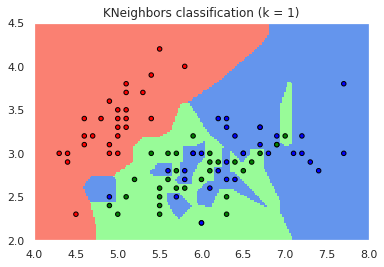

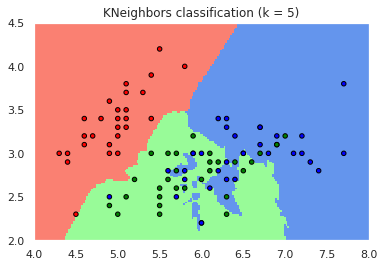

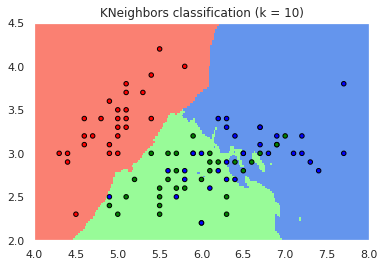

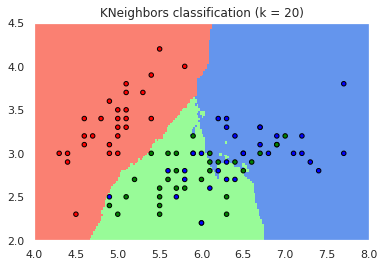

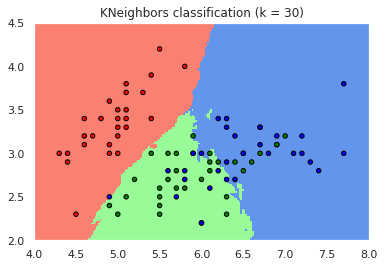

In [167]:
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

r=42
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, random_state=r)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=r) # 0.25 x 0.8 = 0.2

# Create color maps
cmap_light = ListedColormap(['salmon', 'palegreen', 'cornflowerblue'])
cmap_bold = ListedColormap(['red', 'green', 'blue'])


def KNeighbors(k,X,y,h):
    clf = sklearn.neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNeighbors classification (k = %i)"
              % (k))
    plt.xlim(4,8)
    plt.ylim(2,4.5)
    plt.show()


for k in [1, 5, 10, 20, 30]:
    KNeighbors(k,X_train,y_train,.02)